In [1]:
import ira
%alphalab dark

from alpha.utils.tick_loaders import load_data, ls_data
from alpha.loaders.dsloaders import dslist, dssources, dsload

(c) 2017, AppliedAlpha Infrastructure for Quantitative Research and Analysis, ver. master: 
0.1513

<h1>Data</h1>
<hr class='l3'/>

 - Low level data (Level1, Level2 and TAS) are stored in KDB/Q+.

 - All data are being collected in realtime using <font color='orange'>connectors</font> implemented in Java. 
     - Supported: IB, FXCM, DukasCopy, AMP futures (any MT5 provider), OKeX, BitMex, Binance, Kraken, Bitstamp, Bitfinex, HitBTC.
     
   
 - Connector is programming module (written in Java) and can be used both for historical data collecting either for providing realtime data feed for trading strategy
 
 - Connector should implement common interface and can be plugged into framework then
 

## Loading historical data from Operational DB

In [2]:
ls_data()

[BITMEX]
	ticks:	ETHUSD,XBTUSD
[BITMEXH]
	m1:	EOSH19,EOSH20,EOSH21,EOSM19,EOSM20,EOSM21
		EOSU18,EOSU19,EOSU20,EOSUSDT,EOSZ18,EOSZ19
		EOSZ20,ETHH18,ETHH19,ETHH20,ETHH21,ETHM18
		ETHM19,ETHM20,ETHM21,ETHU18,ETHU19,ETHU20
		ETHUSD,ETHZ18,ETHZ19,ETHZ20,LINKUSDT,LTCH18
		LTCH19,LTCH20,LTCH21,LTCM18,LTCM19,LTCM20
		LTCM21,LTCU18,LTCU19,LTCU20,LTCUSD
		LTCZ18,LTCZ19,LTCZ20,UNIUSDT,XBTH18
		XBTH19,XBTH20,XBTH21,XBTM18,XBTM19
		XBTM20,XBTM21,XBTU18,XBTU19,XBTU20
		XBTU21,XBTUSD,XBTZ18,XBTZ19,XBTZ20
[BINANCET]
	m1:	ADAUSDT,AUDIOUSDT,BNBUSDT,BTCUSDT
		DOGEUSDT,DOTUSDT,EOSUSDT,ETCUSDT
		ETHUSDT,NEOUSDT,TRXUSDT,XLMUSDT
[BINANCE]
	m1:	BNBUSDT,BTCUSDT,EOSUSDT,ETHUSDT
		LINKUSDT,UNIUSDT,XRPUSDT
[DUKAS]
	m1:	AUDJPY,AUDUSD,CADJPY,CHFJPY,EURAUD,EURCAD
		EURCHF,EURGBP,EURJPY,EURNOK,EURSEK,EURUSD
		GBPCHF,GBPJPY,GBPUSD,NZDJPY,NZDUSD
		USA30IDXUSD,USA500IDXUSD,USDCAD,USDCHF,USDCNH
		USDJPY,USDNOK,USDSEK,XAGUSD,XAUUSD
[BITMEXQ]
	m1:	AXSUSDT,DOGEUSDT,DOTUSDT,EOSUSDT
		ETHUSD,LINKUSDT,XBTUSD
[AMP]
	m1:	MESH2

In [3]:
data = load_data('BITMEXH:XBTUSD')

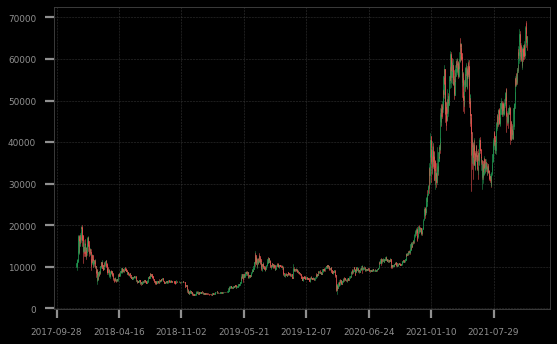

In [4]:
ohlc_plot(data.ohlc('1d')['XBTUSD'])

In [5]:
data2 = load_data('DUKAS:EURUSD', 'DUKAS:USDCHF')

In [6]:
data2.ohlc('1H')['EURUSD']

,open,high,low,close,volume
time,,,,,
2014-01-01 22:00:00,1.375950,1.376575,1.374065,1.376180,882
2014-01-01 23:00:00,1.376250,1.377350,1.376225,1.376600,1197
2014-01-02 00:00:00,1.376600,1.376970,1.375885,1.375930,1170
2014-01-02 01:00:00,1.375925,1.376585,1.375100,1.376365,1134
2014-01-02 02:00:00,1.376355,1.376770,1.376045,1.376635,1132
...,...,...,...,...,...
2021-04-30 16:00:00,1.202985,1.203595,1.202480,1.202665,2569
2021-04-30 17:00:00,1.202675,1.203050,1.201950,1.202215,2473
2021-04-30 18:00:00,1.202210,1.202835,1.201825,1.202120,2079


In [7]:
data2.ohlc('1H')['USDCHF']

,open,high,low,close,volume
time,,,,,
2014-01-01 22:00:00,0.891710,0.892855,0.891610,0.892050,828
2014-01-01 23:00:00,0.892065,0.892185,0.891315,0.891575,862
2014-01-02 00:00:00,0.891595,0.892225,0.891525,0.892025,1026
2014-01-02 01:00:00,0.892040,0.892260,0.891250,0.891430,1410
2014-01-02 02:00:00,0.891450,0.891695,0.891365,0.891420,1028
...,...,...,...,...,...
2021-04-30 16:00:00,0.912810,0.913315,0.912355,0.912925,2129
2021-04-30 17:00:00,0.912945,0.913470,0.912700,0.913410,1807
2021-04-30 18:00:00,0.913415,0.913585,0.913085,0.913410,1557


In [9]:
closes = retain_columns_and_join(data2.ohlc('1H'), 'close')

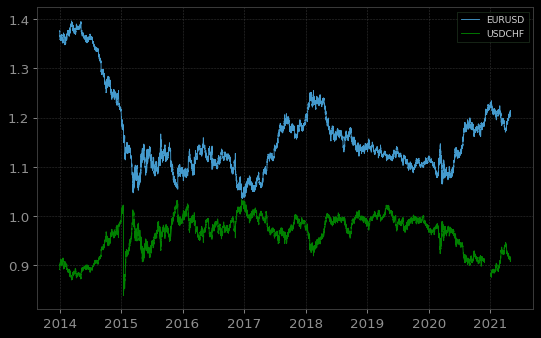

In [10]:
plt.plot(closes)
plt.legend(closes.columns);

# Access data storages

In [2]:
dssources()

,databank,db2,dataserver
quotes,"bitmexh, binance/spot, binance/perp, bitmex, d...",binance/spot,*
trades,"bitmexh, binance/spot, binance/perp, bitmex, h...",binance/spot,*
orders,bitmex,NaN,


In [ ]:
dslist('q', 'bitmexh', 'ds')

In [ ]:
# dsload('XBTUSD', 'q', 'bitmexh', start='2021-01-01', stop='2021-01-02', timeframe='5Min', storage='db')